In [1]:
import sys
import numpy as np

np.set_printoptions(threshold=sys.maxsize)

In [2]:
# 전처리 관련 모듈

import warnings; warnings.simplefilter('ignore')
import pandas as pd
import numpy as np
from numpy import quantile, where
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import missingno as msno

import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot

In [3]:
dataset = pd.read_csv("21y_삼성전자-광운대학교_1차_masked_data_3.csv")
dataset.head(5)

,DATETIME,y,x1,x2,x3,x4,x5,x6,x7,x8,...,x391,x392,x393,x394,x395,x396,x397,x398,x399,x400
0,2019-07-01 00:00:00,0.388361,0.135838,0.125158,0.356172,0.268156,0.100000,0.875,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2019-07-01 01:00:00,0.386105,0.163776,0.175095,0.329176,0.340782,0.000000,0.875,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2019-07-01 02:00:00,0.370334,0.107900,0.112200,0.329176,0.212291,0.066667,0.875,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2019-07-01 03:00:00,0.374447,0.129094,0.105563,0.268199,0.212291,0.000000,0.875,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2019-07-01 04:00:00,0.378483,0.069364,0.085967,0.240052,0.368715,0.000000,0.875,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
coefficient_dataset = pd.read_csv("21y_삼성전자-광운대학교_1차_masked_input_3.csv")

In [5]:
coefficient = coefficient_dataset.fillna(0)
dataset_col = dataset.columns.drop('DATETIME')
dataset_re = dataset[dataset_col]

target_value = []
for i in range(dataset_re.shape[0]):
    
    target_value.append(((dataset_re.iloc[i])*(coefficient.iloc[0])).sum())
    
dataset['target'] = target_value

In [6]:
dataset

,DATETIME,y,x1,x2,x3,x4,x5,x6,x7,x8,...,x392,x393,x394,x395,x396,x397,x398,x399,x400,target
0,2019-07-01 00:00:00,0.388361,0.135838,0.125158,0.356172,0.268156,0.100000,0.875,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,6.358059
1,2019-07-01 01:00:00,0.386105,0.163776,0.175095,0.329176,0.340782,0.000000,0.875,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,6.318522
2,2019-07-01 02:00:00,0.370334,0.107900,0.112200,0.329176,0.212291,0.066667,0.875,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,6.198174
3,2019-07-01 03:00:00,0.374447,0.129094,0.105563,0.268199,0.212291,0.000000,0.875,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,5.672584
4,2019-07-01 04:00:00,0.378483,0.069364,0.085967,0.240052,0.368715,0.000000,0.875,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,5.704031
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15523,2021-04-07 19:00:00,0.893915,0.676301,0.638748,0.392197,0.469274,0.133333,1.000,0.0,0.0,...,0.805433,0.885686,0.785548,0.961285,0.0,0.0,0.0,0.0,0.0,21.010619
15524,2021-04-07 20:00:00,0.882925,0.676301,0.645702,0.392197,0.480447,0.066667,1.000,0.0,0.0,...,0.812247,0.886341,0.764569,0.942392,0.0,0.0,0.0,0.0,0.0,20.722235
15525,2021-04-07 21:00:00,0.899850,0.673410,0.645702,0.392197,0.469274,0.066667,1.000,0.0,0.0,...,0.813360,0.884048,0.778555,0.944245,0.0,0.0,0.0,0.0,0.0,20.661129
15526,2021-04-07 22:00:00,0.889085,0.673410,0.645702,0.392197,0.469274,0.066667,1.000,0.0,0.0,...,0.809605,0.902064,0.748252,0.950542,0.0,0.0,0.0,0.0,0.0,21.042554


In [7]:
dataset = dataset.fillna(0)
dataset.shape

(15528, 403)

In [8]:
dataset = dataset[dataset['DATETIME']>'2019-12-31 23:00:00'].reset_index(drop=True)

In [9]:
df_zero = dataset.replace(0, np.NaN)

# row가 모두 0인 feature list
feature_0 = list(set(df_zero.columns) - set(df_zero.dropna(how='all', axis=1).columns))

# row가 모두 0인 feature 삭제
dataset = dataset.drop(feature_0, axis=1)
df_zero = df_zero.drop(feature_0, axis=1)

print("삭제feature : ", feature_0)
print("삭제 후 : ", dataset.shape)

삭제feature :  ['x249', 'x8', 'x350', 'x308', 'x272', 'x257', 'x387', 'x22', 'x232', 'x386', 'x306', 'x40', 'x247', 'x361', 'x322', 'x31', 'x280', 'x283', 'x7', 'x309', 'x244', 'x240', 'x384', 'x358', 'x400']
삭제 후 :  (11112, 378)


In [10]:
df_zero = df_zero.dropna(thresh = 11000, axis=1) # 11000개 이상만 남기기
columns = df_zero.columns
dataset = dataset[columns]
dataset.shape

(11112, 296)

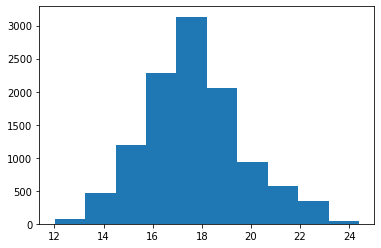

In [11]:
dataset["target"].hist(bins=10, grid=False)
plt.show()

In [12]:
datatime = dataset["DATETIME"]
del dataset["DATETIME"]

In [13]:
dataset

,y,x1,x2,x3,x4,x9,x10,x11,x12,x13,...,x381,x382,x388,x390,x391,x392,x393,x394,x395,target
0,0.179553,0.298651,0.298357,0.330547,0.430168,0.294292,0.33750,0.460527,0.750000,0.093417,...,0.392857,0.634672,0.000000,0.775324,0.362091,0.767393,0.656362,0.548019,0.642474,13.789984
1,0.179183,0.323699,0.298357,0.240632,0.430168,0.299728,0.33750,0.429522,0.750000,0.117852,...,0.413690,0.636887,0.000000,0.776744,0.369314,0.771352,0.653396,0.550194,0.647276,13.589370
2,0.184602,0.317919,0.298357,0.330547,0.430168,0.266123,0.33750,0.429522,0.750000,0.082272,...,0.448810,0.639693,0.000000,0.778759,0.385522,0.769376,0.654746,0.548019,0.637724,14.015291
3,0.182959,0.272640,0.272756,0.240632,0.402235,0.249568,0.33750,0.419209,0.750000,0.083558,...,0.448810,0.636887,0.000607,0.781315,0.404729,0.764786,0.652956,0.550194,0.634782,13.657127
4,0.178988,0.273603,0.268331,0.240632,0.402235,0.236224,0.34375,0.410871,0.750000,0.083558,...,0.392857,0.639693,0.000826,0.782404,0.406585,0.761074,0.648089,0.537607,0.641455,12.997716
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11107,0.893915,0.676301,0.638748,0.392197,0.469274,0.819867,0.76875,0.671511,0.583333,0.213139,...,0.500000,0.657072,0.909493,0.907319,0.611577,0.805433,0.885686,0.785548,0.961285,21.010619
11108,0.882925,0.676301,0.645702,0.392197,0.480447,0.852978,0.75625,0.675296,0.500000,0.164446,...,0.464286,0.657072,0.911246,0.906964,0.627517,0.812247,0.886341,0.764569,0.942392,20.722235
11109,0.899850,0.673410,0.645702,0.392197,0.469274,0.789474,0.76250,0.675296,0.500000,0.180720,...,0.464286,0.665606,0.904451,0.901825,0.621644,0.813360,0.884048,0.778555,0.944245,20.661129
11110,0.889085,0.673410,0.645702,0.392197,0.469274,0.854460,0.76250,0.675296,0.583333,0.180720,...,0.464286,0.640005,0.903356,0.900762,0.619966,0.809605,0.902064,0.748252,0.950542,21.042554


In [14]:
df_log = dataset.apply(lambda x: np.log(x+1))

In [15]:
# thresh = quantile(df_log["target"], .05)
# print(thresh)

In [16]:
min(df_log["target"]), max(df_log["target"])

(2.5657714734742183, 3.234955959782577)

In [17]:
thresh = np.percentile(sorted(df_log["target"]), 5)

In [18]:
df_log.loc[df_log["target"]<=thresh, 'class'] = '0' #이상
df_log.loc[df_log["target"]>thresh, 'class'] = '1' #정상

In [19]:
df_log

,y,x1,x2,x3,x4,x9,x10,x11,x12,x13,...,x382,x388,x390,x391,x392,x393,x394,x395,target,class
0,0.165135,0.261326,0.261099,0.285590,0.357792,0.257964,0.290802,0.378797,0.559616,0.089308,...,0.491442,0.000000,0.573983,0.309021,0.569505,0.504623,0.436976,0.496204,2.693950,0
1,0.164821,0.280430,0.261099,0.215621,0.357792,0.262155,0.290802,0.357340,0.559616,0.111409,...,0.492796,0.000000,0.574783,0.314310,0.571743,0.502832,0.438380,0.499123,2.680293,0
2,0.169407,0.276054,0.261099,0.285590,0.357792,0.235960,0.290802,0.357340,0.559616,0.079063,...,0.494509,0.000000,0.575916,0.326077,0.570627,0.503648,0.436976,0.493308,2.709069,0
3,0.168019,0.241093,0.241185,0.215621,0.338067,0.222798,0.290802,0.350100,0.559616,0.080250,...,0.492796,0.000607,0.577352,0.339845,0.568029,0.502565,0.438380,0.491509,2.684927,0
4,0.164656,0.241850,0.237702,0.215621,0.338067,0.212062,0.295464,0.344208,0.559616,0.080250,...,0.494509,0.000826,0.577963,0.341165,0.565924,0.499617,0.430227,0.495583,2.638894,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11107,0.638646,0.516589,0.493933,0.330883,0.384768,0.598763,0.570273,0.513728,0.459532,0.193211,...,0.505052,0.646838,0.645698,0.477213,0.590801,0.634292,0.579725,0.673600,3.091525,1
11108,0.632826,0.516589,0.498167,0.330883,0.392344,0.616794,0.563181,0.515990,0.405465,0.152246,...,0.505052,0.647756,0.645513,0.487055,0.594568,0.634639,0.567906,0.663920,3.078336,1
11109,0.641775,0.514864,0.498167,0.330883,0.384768,0.581922,0.566733,0.515990,0.405465,0.166125,...,0.510189,0.644194,0.642814,0.483441,0.595181,0.633423,0.575801,0.664874,3.075519,1
11110,0.636093,0.514864,0.498167,0.330883,0.384768,0.617594,0.566733,0.515990,0.459532,0.166125,...,0.494700,0.643618,0.642255,0.482405,0.593109,0.642939,0.558616,0.668107,3.092975,1


1 = normal, 0 = abnormal
1    10556
0      556
Name: class, dtype: int64


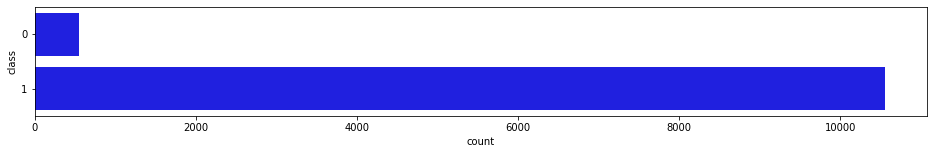

0.05267146646456991


In [20]:
# Plot the balance of class labels
normal = df_log['class']
df_base = df_log.copy()

print('1 = normal, 0 = abnormal')
value_counts = normal.value_counts()
print(value_counts)

plt.figure(figsize=(16,2))
fig = sns.countplot(y=normal, data=df_log, color='b')
plt.show()

contamination_rate = value_counts[1]/value_counts[0]
print(contamination_rate)

In [133]:
train_dataset = df_log['class'].isin(['1'])
train_dataset = df_log.loc[train_dataset]

test_dataset_normal = train_dataset.iloc[10000:]
train_dataset = train_dataset.iloc[:10000]

test_dataset = df_log['class'].isin(['0'])
test_dataset = df_log.loc[test_dataset]

test_dataset = pd.concat([test_dataset_normal, test_dataset])

train_dataset.shape, test_dataset.shape, test_dataset_normal.shape

((10000, 296), (1112, 296), (556, 296))

In [22]:
# train_dataset = df_log['class'].isin(['1'])
# train_dataset = df_log.loc[train_dataset]

In [23]:
# test_dataset_normal = train_dataset.iloc[10000:]
# train_dataset = train_dataset.iloc[:10000]

# test_dataset = df_log['class'].isin(['0'])
# test_dataset = df_log.loc[test_dataset]

# test_dataset = pd.concat([test_dataset_normal, test_dataset])
# train_dataset.shape, test_dataset.shape

In [24]:
# test_dataset = test_dataset.iloc[5:219]

# train_dataset.shape, test_dataset.shape

In [25]:
# test_dataset

In [26]:
y_train = train_dataset["target"]
y__train = train_dataset["y"]
y_test = test_dataset["target"]
y__test = test_dataset['y']

train_class = train_dataset['class']
test_class = test_dataset['class']

del train_dataset["target"]
del test_dataset["target"]
del train_dataset['class']
del test_dataset['class']
del train_dataset['y']
del test_dataset['y']

In [27]:
y_train = y_train.values.reshape(-1,1)
y_test = y_test.values.reshape(-1,1)

In [28]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

scaler = MinMaxScaler()
X_scaled_train  = scaler.fit_transform(train_dataset)
X_scaled_test  = scaler.fit_transform(test_dataset)
y_scaled_train  = scaler.fit_transform(y_train)
y_scaled_test  = scaler.fit_transform(y_test)

In [134]:
X_scaled_train.shape, X_scaled_test.shape, y_scaled_train.shape, y_scaled_test.shape

((10000, 293), (1112, 293), (10000, 1), (1112, 1))

In [29]:
import math 
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import make_scorer, accuracy_score, f1_score, confusion_matrix, classification_report
from sklearn.metrics import precision_recall_fscore_support as score

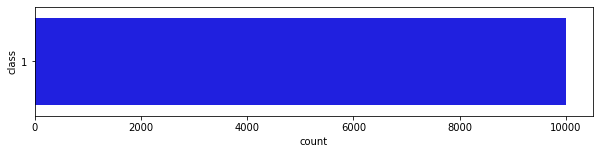

In [30]:
plt.figure(figsize=(10,2))
fig = sns.countplot(y=train_class, data=train_class, color='b')
plt.show()

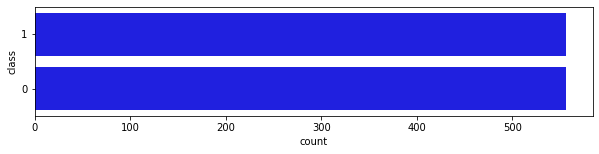

In [31]:
plt.figure(figsize=(10,2))
fig = sns.countplot(y=test_class, data=test_class, color='b')
plt.show()

In [32]:
from sklearn.metrics import make_scorer, accuracy_score, f1_score, confusion_matrix, classification_report
from sklearn.metrics import precision_recall_fscore_support as score

In [33]:
#knn

In [34]:
from pyod.models.knn import KNN
knn = KNN(contamination=0.1, n_neighbors=3, radius=2.0)
knn.fit(X_scaled_train)

KNN(algorithm='auto', contamination=0.1, leaf_size=30, method='largest',
  metric='minkowski', metric_params=None, n_jobs=1, n_neighbors=3, p=2,
  radius=2.0)

In [35]:
anomaly_score_knn_train = knn.decision_function(X_scaled_train)
anomaly_score_knn_train

array([1.00516228, 0.77776022, 1.00516228, 0.97239674, 0.75081933,
       0.75203328, 0.77954923, 0.77954923, 0.89703507, 0.89703507,
       0.75199375, 0.98348966, 1.13399767, 0.93358579, 0.93358579,
       0.88360641, 0.79810794, 0.64721598, 0.79810794, 0.89227827,
       0.80282636, 0.80282636, 0.70795232, 0.69140677, 0.86641935,
       0.86641935, 0.87501782, 0.87501782, 0.78059361, 0.63400036,
       0.66183645, 0.69242369, 0.76416463, 0.77360537, 0.88253532,
       0.77360537, 0.72419708, 0.61421878, 0.62449167, 0.81294712,
       0.81691138, 0.66091414, 0.62958697, 0.66718031, 0.86502465,
       0.86502465, 0.70027901, 0.87101746, 0.84611055, 0.67513688,
       0.63149738, 0.74195258, 1.03069424, 1.06846708, 0.81097915,
       0.92339958, 0.92339958, 0.89887878, 0.98536176, 0.90908348,
       0.87462646, 0.81039481, 0.74622232, 0.74622232, 0.67657837,
       0.67657837, 0.65918544, 0.63390692, 0.71107263, 0.73371161,
       0.74689706, 0.74689706, 0.74902665, 0.88228464, 0.73536

In [36]:
anomaly_score_knn_sorted = sorted(anomaly_score_knn_train)

In [37]:
knn_test_pred = knn.predict(X_scaled_test) 

In [38]:
anomaly_score_knn_test = knn.decision_function(X_scaled_test)
anomaly_score_knn_test.shape

(1112,)

In [39]:
error = np.array(anomaly_score_knn_sorted)     
error = error.reshape(-1,1)

error_test=np.array(anomaly_score_knn_test)
error_test = error_test.reshape(-1,1)

In [40]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

scaler = MinMaxScaler()
scaled_error  = scaler.fit_transform(error)
scaled_error_test  = scaler.fit_transform(error_test)

In [41]:
thresh_knn = np.percentile(scaled_error, 95)

In [42]:
# classifier
df_test = []

def novelty_classifier(novelty_score):
    for i in range(len(novelty_score)):
        if novelty_score[i] > thresh_knn:
            df_test.append('1')
        else:
            df_test.append('0')

In [43]:
novelty_classifier(scaled_error_test)

In [44]:
def measure_performance(model, X_test, y_true, map_labels):
    # predict on testset

    df_pred_test = pd.DataFrame(X_test, columns=['Pred'])
    x_pred = df_pred_test['Pred'] 
    
    matrix = confusion_matrix(x_pred, y_true)

    sns.heatmap(pd.DataFrame(matrix, columns = ['Actual', 'Predicted']),
                xticklabels=['Normal [0]', 'Abnormal [1]'], 
                yticklabels=['Normal [0]', 'Abnormal [1]'], 
                annot=True, fmt="d", linewidths=.5, cmap="YlGnBu")
    plt.ylabel('Predicted')
    plt.xlabel('Actual')
    
    print(classification_report(X_test, y_true))
    
    model_score = score(X_test, y_true,average='macro')
    print(f'f1_score: {np.round(model_score[2]*100, 2)}%')
    
    return model_score

              precision    recall  f1-score   support

           0       0.69      0.72      0.70       535
           1       0.73      0.70      0.71       577

    accuracy                           0.71      1112
   macro avg       0.71      0.71      0.71      1112
weighted avg       0.71      0.71      0.71      1112

f1_score: 70.76%


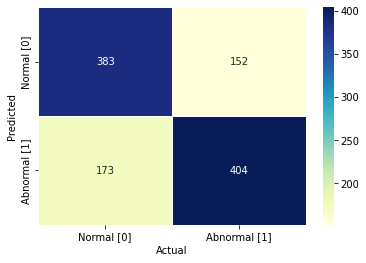

In [45]:
map_labels = True 
model_score = measure_performance(knn, df_test, test_class, map_labels)
performance_df = pd.DataFrame().append({'model_name':knn, 
                                    'f1_score': model_score[0], 
                                    'precision': model_score[1], 
                                    'recall': model_score[2]}, ignore_index=True)

In [46]:
#TPR=TP/(TP+FN), FPR=FP/(FP+TN)
TPR_knn = 81/(81+31)
FPR_knn = 54/(54+58)
print("TPR: ", TPR_knn,"FPR: ", FPR_knn)

TPR:  0.7232142857142857 FPR:  0.48214285714285715


In [47]:
#Precision=TP/(TP+FP), Recall=TP/(TP+FN)
precision_knn = 81/(81+54)
recall_knn = TPR_knn
print("precision: ", precision_knn, "recall: ", recall_knn)

precision:  0.6 recall:  0.7232142857142857


In [48]:
#CBLOF  Cluster-based Local Outlier Factor

In [49]:
from pyod.models.cblof import CBLOF
CBLOF = CBLOF(contamination=0.1, check_estimator=False, random_state=1)
CBLOF.fit(X_scaled_train)

CBLOF(alpha=0.9, beta=5, check_estimator=False, clustering_estimator=None,
   contamination=0.1, n_clusters=8, n_jobs=None, random_state=1,
   use_weights=False)

In [50]:
anomaly_score_CBLOF_train = CBLOF.decision_function(X_scaled_train)
anomaly_score_CBLOF_train

array([3.45871656, 3.44879491, 3.45737825, 3.45685231, 3.328001  ,
       3.30413566, 3.2534992 , 3.21366611, 3.27361741, 3.32929616,
       3.28046887, 3.29345722, 3.19160849, 3.25357032, 3.33692647,
       3.3619595 , 3.56072639, 3.5409668 , 3.58781345, 3.74726306,
       3.82509386, 3.73247515, 3.7690513 , 3.75733077, 3.83045791,
       3.90401674, 3.93387042, 3.69702678, 3.63866287, 3.5837549 ,
       3.53781727, 3.42708996, 3.41002806, 3.45722679, 3.51384602,
       3.68349604, 3.76229699, 3.71458248, 3.7037162 , 3.59057964,
       3.58391214, 3.69409716, 3.7685839 , 3.86798068, 3.92204334,
       3.94032292, 3.98159288, 4.03844828, 3.80409263, 3.79638335,
       3.77783701, 3.76684523, 3.78853328, 3.25508704, 3.24209124,
       3.2019098 , 3.29737985, 3.22138198, 3.22155719, 3.18955793,
       3.15978459, 3.21270865, 3.20160679, 3.19154672, 3.20761729,
       3.16838796, 3.21972187, 3.24401045, 3.30447728, 3.33296283,
       3.30834107, 3.31286587, 3.278787  , 3.34027429, 3.33845

In [51]:
anomaly_score_CBLOF_sorted = sorted(anomaly_score_CBLOF_train)

In [52]:
CBLOF_test_pred = CBLOF.predict(X_scaled_test) 

In [53]:
anomaly_score_CBLOF_test = CBLOF.decision_function(X_scaled_test)
anomaly_score_CBLOF_test.shape

(1112,)

In [54]:
error = np.array(anomaly_score_CBLOF_sorted)     
error = error.reshape(-1,1)

error_test=np.array(anomaly_score_CBLOF_test)
error_test = error_test.reshape(-1,1)

In [55]:
scaler = MinMaxScaler()
scaled_error  = scaler.fit_transform(error)
scaled_error_test  = scaler.fit_transform(error_test)

In [56]:
thresh_CBLOF = np.percentile(scaled_error, 95)

In [57]:
# classifier
df_test = []

def novelty_classifier(novelty_score):
    for i in range(len(novelty_score)):
        if novelty_score[i] > thresh_CBLOF:
            df_test.append('1')
        else:
            df_test.append('0')

In [58]:
novelty_classifier(scaled_error_test)

In [59]:
def measure_performance(model, X_test, y_true, map_labels):
    # predict on testset

    df_pred_test = pd.DataFrame(X_test, columns=['Pred'])
    x_pred = df_pred_test['Pred'] 
    
    matrix = confusion_matrix(x_pred, y_true)

    sns.heatmap(pd.DataFrame(matrix, columns = ['Actual', 'Predicted']),
                xticklabels=['Normal [0]', 'Abnormal [1]'], 
                yticklabels=['Normal [0]', 'Abnormal [1]'], 
                annot=True, fmt="d", linewidths=.5, cmap="YlGnBu")
    plt.ylabel('Predicted')
    plt.xlabel('Actual')
    
    print(classification_report(X_test, y_true))
    
    model_score = score(X_test, y_true,average='macro')
    print(f'f1_score: {np.round(model_score[2]*100, 2)}%')
    
    return model_score

              precision    recall  f1-score   support

           0       0.36      0.35      0.36       569
           1       0.34      0.34      0.34       543

    accuracy                           0.35      1112
   macro avg       0.35      0.35      0.35      1112
weighted avg       0.35      0.35      0.35      1112

f1_score: 34.79%


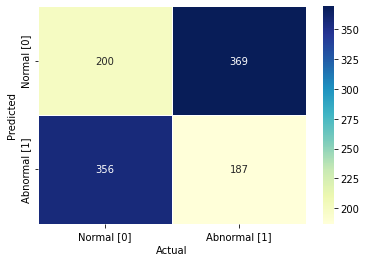

In [60]:
map_labels = True 
model_score = measure_performance(CBLOF, df_test, test_class, map_labels)
performance_df = pd.DataFrame().append({'model_name':CBLOF, 
                                    'f1_score': model_score[0], 
                                    'precision': model_score[1], 
                                    'recall': model_score[2]}, ignore_index=True)

In [61]:
#TPR=TP/(TP+FN), FPR=FP/(FP+TN)
TPR_CBLOF = 111/(111+1)
FPR_CBLOF = 66/(66+46)
print("TPR: ", TPR_CBLOF,"FPR: ", FPR_CBLOF)

TPR:  0.9910714285714286 FPR:  0.5892857142857143


In [62]:
#Precision=TP/(TP+FP), Recall=TP/(TP+FN)
precision_CBLOF = 111/(111+66)
recall_CBLOF = TPR_CBLOF
print("precision: ", precision_CBLOF, "recall: ", recall_CBLOF)

precision:  0.6271186440677966 recall:  0.9910714285714286


In [63]:
from pyod.models.hbos import HBOS
HBOS = HBOS(contamination=0.1)
HBOS.fit(X_scaled_train)

HBOS(alpha=0.1, contamination=0.1, n_bins=10, tol=0.5)

In [64]:
anomaly_score_HBOS_train = CBLOF.decision_function(X_scaled_train)
anomaly_score_HBOS_train

array([3.45871656, 3.44879491, 3.45737825, 3.45685231, 3.328001  ,
       3.30413566, 3.2534992 , 3.21366611, 3.27361741, 3.32929616,
       3.28046887, 3.29345722, 3.19160849, 3.25357032, 3.33692647,
       3.3619595 , 3.56072639, 3.5409668 , 3.58781345, 3.74726306,
       3.82509386, 3.73247515, 3.7690513 , 3.75733077, 3.83045791,
       3.90401674, 3.93387042, 3.69702678, 3.63866287, 3.5837549 ,
       3.53781727, 3.42708996, 3.41002806, 3.45722679, 3.51384602,
       3.68349604, 3.76229699, 3.71458248, 3.7037162 , 3.59057964,
       3.58391214, 3.69409716, 3.7685839 , 3.86798068, 3.92204334,
       3.94032292, 3.98159288, 4.03844828, 3.80409263, 3.79638335,
       3.77783701, 3.76684523, 3.78853328, 3.25508704, 3.24209124,
       3.2019098 , 3.29737985, 3.22138198, 3.22155719, 3.18955793,
       3.15978459, 3.21270865, 3.20160679, 3.19154672, 3.20761729,
       3.16838796, 3.21972187, 3.24401045, 3.30447728, 3.33296283,
       3.30834107, 3.31286587, 3.278787  , 3.34027429, 3.33845

In [65]:
anomaly_score_HBOS_sorted = sorted(anomaly_score_HBOS_train)

In [66]:
HBOS_test_pred = HBOS.predict(X_scaled_test) 

In [67]:
anomaly_score_HBOS_test = HBOS.decision_function(X_scaled_test)
anomaly_score_HBOS_test.shape

(1112,)

In [68]:
error = np.array(anomaly_score_HBOS_sorted)     
error = error.reshape(-1,1)

error_test=np.array(anomaly_score_HBOS_test)
error_test = error_test.reshape(-1,1)

In [69]:
scaler = MinMaxScaler()
scaled_error  = scaler.fit_transform(error)
scaled_error_test  = scaler.fit_transform(error_test)

In [70]:
thresh_HBOS = np.percentile(scaled_error, 95)

In [71]:
# classifier
df_test = []

def novelty_classifier(novelty_score):
    for i in range(len(novelty_score)):
        if novelty_score[i] > thresh_HBOS:
            df_test.append('1')
        else:
            df_test.append('0')

In [72]:
novelty_classifier(scaled_error_test)

In [73]:
def measure_performance(model, X_test, y_true, map_labels):
    # predict on testset

    df_pred_test = pd.DataFrame(X_test, columns=['Pred'])
    x_pred = df_pred_test['Pred'] 
    
    matrix = confusion_matrix(x_pred, y_true)

    sns.heatmap(pd.DataFrame(matrix, columns = ['Actual', 'Predicted']),
                xticklabels=['Normal [0]', 'Abnormal [1]'], 
                yticklabels=['Normal [0]', 'Abnormal [1]'], 
                annot=True, fmt="d", linewidths=.5, cmap="YlGnBu")
    plt.ylabel('Predicted')
    plt.xlabel('Actual')
    
    print(classification_report(X_test, y_true))
    
    model_score = score(X_test, y_true,average='macro')
    print(f'f1_score: {np.round(model_score[2]*100, 2)}%')
    
    return model_score

              precision    recall  f1-score   support

           0       0.76      0.81      0.78       518
           1       0.82      0.77      0.80       594

    accuracy                           0.79      1112
   macro avg       0.79      0.79      0.79      1112
weighted avg       0.79      0.79      0.79      1112

f1_score: 78.93%


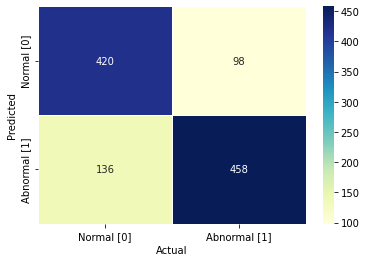

In [74]:
map_labels = True 
model_score = measure_performance(HBOS, df_test, test_class, map_labels)
performance_df = pd.DataFrame().append({'model_name':HBOS, 
                                    'f1_score': model_score[0], 
                                    'precision': model_score[1], 
                                    'recall': model_score[2]}, ignore_index=True)

In [75]:
#TPR=TP/(TP+FN), FPR=FP/(FP+TN)
TPR_HBOS = 84/(84+28)
FPR_HBOS = 20/(20+92)
print("TPR: ", TPR_HBOS,"FPR: ", FPR_HBOS)

TPR:  0.75 FPR:  0.17857142857142858


In [76]:
#Precision=TP/(TP+FP), Recall=TP/(TP+FN)
precision_HBOS = 84/(84+20)
recall_HBOS = TPR_HBOS
print("precision: ", precision_HBOS, "recall: ", recall_HBOS)

precision:  0.8076923076923077 recall:  0.75


In [77]:
from pyod.models.mcd import MCD
MCD = MCD(contamination=0.001, random_state=5)
MCD.fit(X_scaled_train)

MCD(assume_centered=False, contamination=0.001, random_state=5,
  store_precision=True, support_fraction=None)

In [78]:
anomaly_score_MCD_train = MCD.decision_function(X_scaled_train)
anomaly_score_MCD_train

array([3.36349802e+03, 3.02136112e+03, 3.13930347e+03, 2.87905254e+03,
       3.08525707e+03, 3.02271356e+03, 3.04618914e+03, 3.21224191e+03,
       3.35479475e+03, 3.76579945e+03, 3.73155767e+03, 3.62681289e+03,
       2.91667627e+03, 2.76196356e+03, 2.75554090e+03, 2.77406732e+03,
       2.70962705e+03, 2.62400710e+03, 2.59289320e+03, 2.52301515e+03,
       2.57197265e+03, 2.77974144e+03, 2.72874204e+03, 2.72598564e+03,
       2.61793346e+03, 2.71623964e+03, 2.77449265e+03, 2.63584535e+03,
       2.66032259e+03, 2.73135301e+03, 2.69349835e+03, 2.68994197e+03,
       2.54225761e+03, 2.60981958e+03, 2.60296935e+03, 2.78452590e+03,
       2.86822601e+03, 2.74588070e+03, 2.67099502e+03, 2.64187999e+03,
       2.70044309e+03, 2.83879078e+03, 2.74520491e+03, 2.75915249e+03,
       2.78417678e+03, 2.68508937e+03, 2.91713033e+03, 2.99130211e+03,
       2.62109033e+03, 2.61418884e+03, 2.68412162e+03, 2.54628489e+03,
       2.88441254e+03, 3.35170634e+03, 4.73750628e+03, 4.74339859e+03,
      

In [79]:
anomaly_score_MCD_sorted = sorted(anomaly_score_MCD_train)

In [80]:
MCD_test_pred = MCD.predict(X_scaled_test) 

In [81]:
anomaly_score_MCD_test = MCD.decision_function(X_scaled_test)
anomaly_score_MCD_test.shape

(1112,)

In [82]:
error = np.array(anomaly_score_MCD_sorted)     
error = error.reshape(-1,1)

error_test=np.array(anomaly_score_MCD_test)
error_test = error_test.reshape(-1,1)

In [83]:
scaler = MinMaxScaler()
scaled_error  = scaler.fit_transform(error)
scaled_error_test  = scaler.fit_transform(error_test)

In [84]:
thresh_MCD = np.percentile(scaled_error, 95)

In [85]:
# classifier
df_test = []

def novelty_classifier(novelty_score):
    for i in range(len(novelty_score)):
        if novelty_score[i] > thresh_MCD:
            df_test.append('1')
        else:
            df_test.append('0')

In [86]:
novelty_classifier(scaled_error_test)

In [87]:
def measure_performance(model, X_test, y_true, map_labels):
    # predict on testset

    df_pred_test = pd.DataFrame(X_test, columns=['Pred'])
    x_pred = df_pred_test['Pred'] 
    
    matrix = confusion_matrix(x_pred, y_true)

    sns.heatmap(pd.DataFrame(matrix, columns = ['Actual', 'Predicted']),
                xticklabels=['Normal [0]', 'Abnormal [1]'], 
                yticklabels=['Normal [0]', 'Abnormal [1]'], 
                annot=True, fmt="d", linewidths=.5, cmap="YlGnBu")
    plt.ylabel('Predicted')
    plt.xlabel('Actual')
    
    print(classification_report(X_test, y_true))
    
    model_score = score(X_test, y_true,average='macro')
    print(f'f1_score: {np.round(model_score[2]*100, 2)}%')
    
    return model_score

              precision    recall  f1-score   support

           0       0.04      1.00      0.08        22
           1       1.00      0.51      0.68      1090

    accuracy                           0.52      1112
   macro avg       0.52      0.76      0.38      1112
weighted avg       0.98      0.52      0.66      1112

f1_score: 37.59%


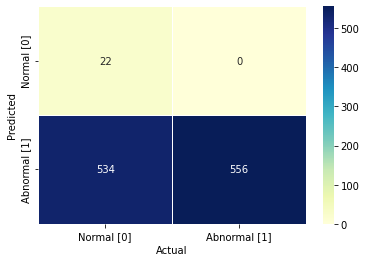

In [88]:
map_labels = True 
model_score = measure_performance(MCD, df_test, test_class, map_labels)
performance_df = pd.DataFrame().append({'model_name':MCD, 
                                    'f1_score': model_score[0], 
                                    'precision': model_score[1], 
                                    'recall': model_score[2]}, ignore_index=True)

In [89]:
#TPR=TP/(TP+FN), FPR=FP/(FP+TN)
TPR_MCD = 89/(89+23)
FPR_MCD = 0/(0+112)
print("TPR: ", TPR_MCD,"FPR: ", FPR_MCD)

TPR:  0.7946428571428571 FPR:  0.0


In [90]:
#Precision=TP/(TP+FP), Recall=TP/(TP+FN)
precision_MCD = 89/(89+0)
recall_MCD = TPR_MCD
print("precision: ", precision_MCD, "recall: ", recall_MCD)

precision:  1.0 recall:  0.7946428571428571


In [91]:
from pyod.models.pca import PCA
PCA = PCA(contamination=0.1)
PCA.fit(X_scaled_train)

PCA(contamination=0.1, copy=True, iterated_power='auto', n_components=None,
  n_selected_components=None, random_state=None, standardization=True,
  svd_solver='auto', tol=0.0, weighted=True, whiten=False)

In [92]:
anomaly_score_PCA_train = PCA.decision_function(X_scaled_train)
anomaly_score_PCA_train

array([1.39117807e+35, 1.37985875e+35, 1.38638476e+35, 1.37865650e+35,
       1.32527107e+35, 1.33678680e+35, 1.30210337e+35, 1.29507375e+35,
       1.30508281e+35, 1.35756185e+35, 1.34234659e+35, 1.38728832e+35,
       1.34739374e+35, 1.34776481e+35, 1.40001783e+35, 1.36385628e+35,
       1.42720453e+35, 1.41434684e+35, 1.43203055e+35, 1.50076447e+35,
       1.56402808e+35, 1.54573939e+35, 1.57174919e+35, 1.54542815e+35,
       1.57054808e+35, 1.60332116e+35, 1.60979326e+35, 1.55061662e+35,
       1.53671525e+35, 1.52113403e+35, 1.50106679e+35, 1.45660848e+35,
       1.43802616e+35, 1.44144430e+35, 1.45716073e+35, 1.50601223e+35,
       1.55077509e+35, 1.53321602e+35, 1.53010717e+35, 1.49681389e+35,
       1.46721514e+35, 1.53419838e+35, 1.58884194e+35, 1.61644384e+35,
       1.63018458e+35, 1.62881338e+35, 1.64122267e+35, 1.66670007e+35,
       1.54794413e+35, 1.53204516e+35, 1.53200206e+35, 1.54302403e+35,
       1.53862169e+35, 1.31298158e+35, 1.30672386e+35, 1.31742030e+35,
      

In [93]:
anomaly_score_PCA_sorted = sorted(anomaly_score_PCA_train)

In [94]:
PCA_test_pred = PCA.predict(X_scaled_test) 

In [95]:
anomaly_score_PCA_test = PCA.decision_function(X_scaled_test)
anomaly_score_PCA_test.shape

(1112,)

In [96]:
error = np.array(anomaly_score_PCA_sorted)     
error = error.reshape(-1,1)

error_test=np.array(anomaly_score_PCA_test)
error_test = error_test.reshape(-1,1)

In [97]:
scaler = MinMaxScaler()
scaled_error  = scaler.fit_transform(error)
scaled_error_test  = scaler.fit_transform(error_test)

In [98]:
thresh_PCA = np.percentile(scaled_error, 95)

In [99]:
# classifier
df_test = []

def novelty_classifier(novelty_score):
    for i in range(len(novelty_score)):
        if novelty_score[i] > thresh_PCA:
            df_test.append('1')
        else:
            df_test.append('0')

In [100]:
novelty_classifier(scaled_error_test)

In [101]:
def measure_performance(model, X_test, y_true, map_labels):
    # predict on testset

    df_pred_test = pd.DataFrame(X_test, columns=['Pred'])
    x_pred = df_pred_test['Pred'] 
    
    matrix = confusion_matrix(x_pred, y_true)

    sns.heatmap(pd.DataFrame(matrix, columns = ['Actual', 'Predicted']),
                xticklabels=['Normal [0]', 'Abnormal [1]'], 
                yticklabels=['Normal [0]', 'Abnormal [1]'], 
                annot=True, fmt="d", linewidths=.5, cmap="YlGnBu")
    plt.ylabel('Predicted')
    plt.xlabel('Actual')
    
    print(classification_report(X_test, y_true))
    
    model_score = score(X_test, y_true,average='macro')
    print(f'f1_score: {np.round(model_score[2]*100, 2)}%')
    
    return model_score

              precision    recall  f1-score   support

           0       0.98      0.73      0.84       747
           1       0.64      0.97      0.77       365

    accuracy                           0.81      1112
   macro avg       0.81      0.85      0.80      1112
weighted avg       0.87      0.81      0.82      1112

f1_score: 80.45%


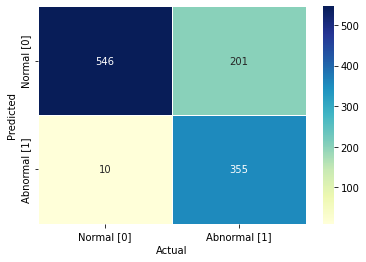

In [102]:
map_labels = True 
model_score = measure_performance(PCA, df_test, test_class, map_labels)
performance_df = pd.DataFrame().append({'model_name':PCA, 
                                    'f1_score': model_score[0], 
                                    'precision': model_score[1], 
                                    'recall': model_score[2]}, ignore_index=True)

In [103]:
#TPR=TP/(TP+FN), FPR=FP/(FP+TN)
TPR_PCA = 111/(111+1)
FPR_PCA = 72/(72+40)
print("TPR: ", TPR_PCA,"FPR: ", FPR_PCA)

TPR:  0.9910714285714286 FPR:  0.6428571428571429


In [104]:
#Precision=TP/(TP+FP), Recall=TP/(TP+FN)
precision_PCA = 111/(111+72)
recall_PCA = TPR_PCA
print("precision: ", precision_PCA, "recall: ", recall_PCA)

precision:  0.6065573770491803 recall:  0.9910714285714286


In [105]:
from pyod.models.ocsvm import OCSVM
OCSVM = OCSVM(kernel='rbf', degree=10, gamma='auto', nu=0.5)
OCSVM.fit(X_scaled_train)

OCSVM(cache_size=200, coef0=0.0, contamination=0.1, degree=10, gamma='auto',
   kernel='rbf', max_iter=-1, nu=0.5, shrinking=True, tol=0.001,
   verbose=False)

In [106]:
anomaly_score_OCSVM_train = OCSVM.decision_function(X_scaled_train)
anomaly_score_OCSVM_train

array([ 8.36803519e+01,  7.82408883e+01,  8.29328380e+01,  7.15494074e+01,
        6.64213793e+01,  6.63936238e+01,  6.14083664e+01,  5.57211180e+01,
        5.79154887e+01,  6.67384005e+01,  6.33929674e+01,  7.33598599e+01,
        6.54678141e+01,  6.77356991e+01,  7.92857040e+01,  7.19583193e+01,
        8.66144130e+01,  8.23063765e+01,  8.30689200e+01,  9.81853426e+01,
        1.13199202e+02,  1.15402522e+02,  1.18933905e+02,  1.14295206e+02,
        1.18745741e+02,  1.24790407e+02,  1.27415863e+02,  1.12807806e+02,
        1.07561811e+02,  1.05730178e+02,  9.89597480e+01,  8.82647808e+01,
        8.68188140e+01,  9.05251605e+01,  9.79374580e+01,  1.08686034e+02,
        1.19283864e+02,  1.14605556e+02,  1.15585625e+02,  1.01887252e+02,
        9.98022184e+01,  1.12274588e+02,  1.21494515e+02,  1.28361920e+02,
        1.33764928e+02,  1.34201657e+02,  1.40759392e+02,  1.48464264e+02,
        1.17089664e+02,  1.14223427e+02,  1.16379473e+02,  1.17701460e+02,
        1.17127102e+02,  

In [107]:
anomaly_score_OCSVM_sorted = sorted(anomaly_score_OCSVM_train)

In [108]:
OCSVM_test_pred = OCSVM.predict(X_scaled_test) 

In [109]:
anomaly_score_OCSVM_test = OCSVM.decision_function(X_scaled_test)
anomaly_score_OCSVM_test.shape

(1112,)

In [110]:
error = np.array(anomaly_score_OCSVM_sorted)     
error = error.reshape(-1,1)

error_test=np.array(anomaly_score_OCSVM_test)
error_test = error_test.reshape(-1,1)

In [111]:
scaler = MinMaxScaler()
scaled_error  = scaler.fit_transform(error)
scaled_error_test  = scaler.fit_transform(error_test)

In [112]:
thresh_OCSVM = np.percentile(scaled_error, 95)

In [113]:
# classifier
df_test = []

def novelty_classifier(novelty_score):
    for i in range(len(novelty_score)):
        if novelty_score[i] > thresh_OCSVM:
            df_test.append('1')
        else:
            df_test.append('0')

In [114]:
novelty_classifier(scaled_error_test)

In [115]:
def measure_performance(model, X_test, y_true, map_labels):
    # predict on testset

    df_pred_test = pd.DataFrame(X_test, columns=['Pred'])
    x_pred = df_pred_test['Pred'] 
    
    matrix = confusion_matrix(x_pred, y_true)

    sns.heatmap(pd.DataFrame(matrix, columns = ['Actual', 'Predicted']),
                xticklabels=['Normal [0]', 'Abnormal [1]'], 
                yticklabels=['Normal [0]', 'Abnormal [1]'], 
                annot=True, fmt="d", linewidths=.5, cmap="YlGnBu")
    plt.ylabel('Predicted')
    plt.xlabel('Actual')
    
    print(classification_report(X_test, y_true))
    
    model_score = score(X_test, y_true,average='macro')
    print(f'f1_score: {np.round(model_score[2]*100, 2)}%')
    
    return model_score

              precision    recall  f1-score   support

           0       0.91      0.66      0.76       768
           1       0.53      0.85      0.65       344

    accuracy                           0.72      1112
   macro avg       0.72      0.75      0.71      1112
weighted avg       0.79      0.72      0.73      1112

f1_score: 70.51%


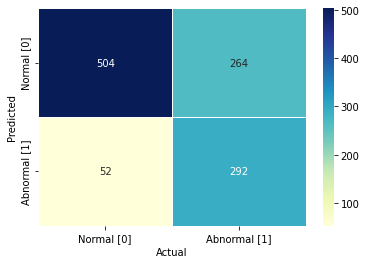

In [116]:
map_labels = True 
model_score = measure_performance(OCSVM, df_test, test_class, map_labels)
performance_df = pd.DataFrame().append({'model_name':OCSVM, 
                                    'f1_score': model_score[0], 
                                    'precision': model_score[1], 
                                    'recall': model_score[2]}, ignore_index=True)

In [117]:
#TPR=TP/(TP+FN), FPR=FP/(FP+TN)
TPR_OCSVM = 107/(107+5)
FPR_OCSVM = 66/(66+46)
print("TPR: ", TPR_OCSVM,"FPR: ", FPR_OCSVM)

TPR:  0.9553571428571429 FPR:  0.5892857142857143


In [118]:
#Precision=TP/(TP+FP), Recall=TP/(TP+FN)
precision_OCSVM = 107/(107+66)
recall_OCSVM = TPR_OCSVM
print("precision: ", precision_OCSVM, "recall: ", recall_OCSVM)

precision:  0.6184971098265896 recall:  0.9553571428571429


In [119]:
from pyod.models.iforest import IForest
IForest = IForest(n_estimators=10, contamination=0.005, random_state=3, verbose=0, bootstrap=False)
IForest.fit(X_scaled_train)

IForest(behaviour='old', bootstrap=False, contamination=0.005,
    max_features=1.0, max_samples='auto', n_estimators=10, n_jobs=1,
    random_state=3, verbose=0)

In [120]:
anomaly_score_IForest_train = IForest.decision_function(X_scaled_train)
anomaly_score_IForest_train

array([-7.26169017e-02, -6.79417161e-02, -8.30454668e-02, -8.37767189e-02,
       -1.04614069e-01, -1.43206644e-01, -1.60749228e-01, -1.32890190e-01,
       -7.68576868e-02, -7.24510527e-02, -4.31239139e-02, -4.96215416e-02,
       -1.15831011e-01, -1.24162824e-01, -1.31514701e-01, -1.45473692e-01,
       -1.25603939e-01, -8.70994685e-02, -1.22639087e-01, -1.00915594e-01,
       -8.10899232e-02, -8.46196100e-02, -9.61925240e-02, -9.61925240e-02,
       -7.61809275e-02, -7.14156635e-02, -8.71541431e-02, -6.41524410e-02,
       -3.67601573e-02, -5.19203686e-02, -2.46485184e-02, -4.77181864e-02,
       -9.23269879e-02, -9.23269879e-02, -6.47559400e-02, -6.97335966e-02,
       -9.50665068e-02, -7.12632780e-02, -4.91690932e-02, -6.76429177e-02,
       -1.03025109e-01, -7.60299041e-02, -6.03282964e-02, -4.93277921e-02,
       -1.37998400e-02,  9.45517860e-03, -1.37998400e-02, -4.16027902e-02,
       -4.44987505e-02, -1.03370688e-01, -5.40466622e-02, -4.91690932e-02,
       -4.53987398e-02, -

In [121]:
anomaly_score_IForest_sorted = sorted(anomaly_score_IForest_train)

In [122]:
IForest_test_pred = IForest.predict(X_scaled_test) 

In [123]:
anomaly_score_IForest_test = IForest.decision_function(X_scaled_test)
anomaly_score_IForest_test.shape

(1112,)

In [124]:
error = np.array(anomaly_score_IForest_sorted)     
error = error.reshape(-1,1)

error_test=np.array(anomaly_score_IForest_test)
error_test = error_test.reshape(-1,1)

In [125]:
scaler = MinMaxScaler()
scaled_error  = scaler.fit_transform(error)
scaled_error_test  = scaler.fit_transform(error_test)

In [126]:
thresh_IForest = np.percentile(scaled_error, 95)

In [127]:
# classifier
df_test = []

def novelty_classifier(novelty_score):
    for i in range(len(novelty_score)):
        if novelty_score[i] > thresh_IForest:
            df_test.append('1')
        else:
            df_test.append('0')

In [128]:
novelty_classifier(scaled_error_test)

In [129]:
def measure_performance(model, X_test, y_true, map_labels):
    # predict on testset

    df_pred_test = pd.DataFrame(X_test, columns=['Pred'])
    x_pred = df_pred_test['Pred'] 
    
    matrix = confusion_matrix(x_pred, y_true)

    sns.heatmap(pd.DataFrame(matrix, columns = ['Actual', 'Predicted']),
                xticklabels=['Normal [0]', 'Abnormal [1]'], 
                yticklabels=['Normal [0]', 'Abnormal [1]'], 
                annot=True, fmt="d", linewidths=.5, cmap="YlGnBu")
    plt.ylabel('Predicted')
    plt.xlabel('Actual')
    
    print(classification_report(X_test, y_true))
    
    model_score = score(X_test, y_true,average='macro')
    print(f'f1_score: {np.round(model_score[2]*100, 2)}%')
    
    return model_score

              precision    recall  f1-score   support

           0       0.80      0.67      0.73       661
           1       0.61      0.75      0.67       451

    accuracy                           0.70      1112
   macro avg       0.70      0.71      0.70      1112
weighted avg       0.72      0.70      0.71      1112

f1_score: 70.15%


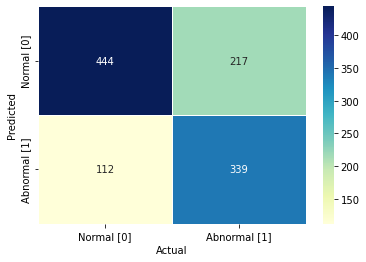

In [130]:
map_labels = True 
model_score = measure_performance(IForest, df_test, test_class, map_labels)
performance_df = pd.DataFrame().append({'model_name':IForest, 
                                    'f1_score': model_score[0], 
                                    'precision': model_score[1], 
                                    'recall': model_score[2]}, ignore_index=True)

In [131]:
#TPR=TP/(TP+FN), FPR=FP/(FP+TN)
TPR_IForest = 105/(105+7)
FPR_IForest = 22/(22+90)
print("TPR: ", TPR_IForest,"FPR: ", FPR_IForest)

TPR:  0.9375 FPR:  0.19642857142857142


In [132]:
#Precision=TP/(TP+FP), Recall=TP/(TP+FN)
precision_IForest = 105/(105+22)
recall_IForest = TPR_IForest
print("precision: ", precision_IForest, "recall: ", recall_IForest)

precision:  0.8267716535433071 recall:  0.9375
